###                                  Activation Functions

1. Sigmoid:
    - range [0,1]
    - used in logistic binary classification
    - sigma(z) = 1/(1 + e^-z) where z = w1*x1 + w2*x2 + ... + wn*xn + b
2. ReLU
    - range [0,infinity]
    - a ramp function
    - multilayer NN
    - good for regression purposes
3. tanh
    - range [-1,1]
    - a S-shaped curve, the tails of the s-curve end at -1 and 1

    input function : F = w1*x1 + w2*x2 + ... + wn*xn + b(bias also w0)
    output : y = G(F)

### Components of a Neural Networks

1. Input layer
2. Hidden layer/layers (can have n number o nodes)
3. Output layer

### Perceptron Implementation

a single neuron is a perceptron

- features: 2 (x1,x2)
- label: y
- activation function: Sigmoid

- input fn (I) = w1*x1+w2*x2+b
- output(o) = Sigmoid(I)

In [ ]:
import tensorflow as tf

#### features and labels

In [ ]:
x=tf.placeholder(tf.float32,[None,2]) #2 features
y=tf.placeholder(tf.float32,[None,1]) #labels

#### weight and bias

In [ ]:
weight=tf.Variable(tf.zeros([2,1])) #[no of input,no of perceptrons in that layer]
bias=tf.Variable(tf.zeros([1]))

#### input function

In [ ]:
input_fn=tf.add(tf.matmul(x,weight),bias)

#### output function

In [ ]:
output=tf.sigmoid(input_fn)

#### define the cost/loss fns and the optimizer

In [ ]:
individual_loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

In [ ]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    #our code

### Implementation Perceptron code

In [ ]:
num_units=10
num_inputs=100
label_size=10

#### defining placeholders for input and output

In [ ]:
x=tf.placeholder(tf.float32,[None,num_inputs]) #input
y=tf.placeholder(tf.float32,[None,label_size]) #label

#### weights and bias

In [ ]:
weight=tf.Variable(tf.zeros([num_inputs,num_units]))
bias=tf.Variable(tf.zeros([num_units]))

#### Input

In [ ]:
I=tf.add(tf.matmul(x,weight),bias)

#### Output

In [ ]:
output=tf.sigmoid(I)

#### Reduce the error

In [ ]:
individual_loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

In [ ]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    #sess.run(train)

## Using the perceptron in an actual data scenario

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('C:/Users/Administrator/Desktop/Term 3/AI/datasets/data.csv')
data.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


In [ ]:
X=data[['x1','x2']].as_matrix()
Y=data[['label']].as_matrix()

C:\Users\Administrator\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [ ]:
p=np.random.permutation(X.shape[0]) #array([19,3,18,10,9,5,14,1,20,17,12,0,16,2,6,15,4,7,13,8,11])

In [ ]:
X=X[p]
Y=Y[p]

In [ ]:
data.label.value_counts()

0    12
1     9
Name: label, dtype: int64

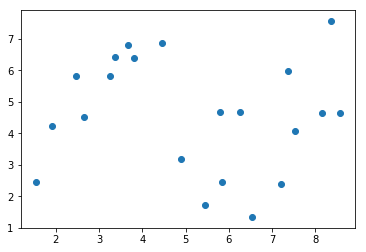

In [ ]:
plt.scatter(data['x1'],data['x2'])
plt.show()

#### defining the perceptron

In [ ]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [ ]:
x=tf.placeholder(tf.float32,[None,2]) 
y=tf.placeholder(tf.float32,[None,1]) 

In [ ]:
weight=tf.Variable(tf.zeros([2,1]))
bias=tf.Variable(tf.zeros([1]))

In [ ]:
print('Weights: ',sess.run(weight))
print('Bias: ',sess.run(bias))

Weights:  [[0.]
 [0.]]
Bias:  [0.]


In [ ]:
I=tf.add(tf.matmul(x,weight),bias)

In [ ]:
output=tf.sigmoid(I)

In [ ]:
individual_loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=gdo.minimize(loss)

In [ ]:
for i in range(1000):
    sess.run(train,feed_dict={x:X,y:Y})
    calculated_loss=sess.run(loss,feed_dict={x:X,y:Y})
    print(calculated_loss)

0.75953615
0.75928134
0.7590268
0.75877273
0.7585189
0.7582655
0.7580124
0.7577597
0.7575073
0.7572554
0.7570037
0.7567525
0.7565017
0.7562512
0.7560011
0.7557514
0.7555021
0.7552532
0.75500476
0.7547567
0.75450903
0.7542618
0.75401497
0.7537686
0.7535227
0.7532771
0.753032
0.7527874
0.7525432
0.7522995
0.75205624
0.75181335
0.751571
0.7513291
0.75108767
0.7508467
0.75060624
0.75036615
0.75012654
0.7498876
0.7496489
0.74941087
0.7491733
0.7489362
0.74869967
0.7484635
0.74822795
0.7479929
0.7477583
0.7475242
0.7472907
0.7470576
0.7468251
0.7465931
0.7463617
0.7461307
0.7459004
0.7456705
0.74544114
0.7452124
0.74498415
0.7447564
0.74452925
0.74430263
0.7440766
0.743851
0.74362606
0.74340165
0.7431778
0.7429545
0.74273175
0.74250954
0.74228793
0.74206686
0.7418464
0.74162644
0.7414071
0.74118835
0.7409701
0.74075246
0.74053544
0.74031895
0.74010307
0.7398877
0.73967296
0.7394588
0.73924524
0.7390322
0.7388198
0.73860794
0.73839676
0.73818606
0.73797596
0.7377665
0.7375577
0.73734933
0.737

0.67689115
0.6768667
0.6768424
0.67681813
0.67679375
0.6767695
0.6767453
0.6767211
0.67669696
0.6766728
0.67664874
0.6766246
0.6766006
0.6765765
0.6765526
0.67652863
0.6765047
0.6764808
0.676457
0.6764331
0.6764093
0.6763856
0.67636174
0.67633796
0.6763143
0.67629063
0.676267
0.67624336
0.6762198
0.67619634
0.67617273
0.67614925
0.6761258
0.67610234
0.6760789
0.67605555
0.6760322
0.6760088
0.6759856
0.67596227
0.67593896
0.6759158
0.67589253
0.67586946
0.6758462
0.67582315
0.6758001
0.675777
0.67575395
0.67573094
0.675708
0.675685
0.6756621
0.67563915
0.67561626
0.67559344
0.6755706
0.6755477
0.675525
0.6755023
0.67547953
0.6754568
0.67543423
0.6754115
0.6753889
0.6753662
0.67534363
0.6753211
0.6752986
0.6752761
0.6752536
0.67523116
0.6752087
0.67518634
0.6751639
0.6751415
0.6751192
0.6750969
0.67507464
0.67505234
0.6750301
0.6750079
0.6749857
0.6749635
0.67494136
0.6749192
0.67489713
0.674875
0.67485297
0.6748309
0.674809
0.674787
0.67476493
0.67474306
0.6747211
0.67469925


In [ ]:
print('Final Loss: ',calculated_loss)

Final Loss:  0.67469925


In [ ]:
print('Weights: ',sess.run(weight))
print('Bias: ',sess.run(bias))

Weights:  [[-0.26362777]
 [-0.00157367]]
Bias:  [-0.01732997]


### On testing

In [ ]:
w=tf.Variable([])

In [ ]:
b=tf.Variable([[1.0]])

In [ ]:
x=tf.Variable([[7.0,3.0]])

## Perceptron Code general softmax

In [ ]:
import tensorflow as tf

In [ ]:
num_units=3
num_inputs=10
label_size=1

In [ ]:
x=tf.placeholder(tf.float32,[num_inputs,num_units])
y=tf.placeholder(tf.float32,[None,label_size])

In [ ]:
weight=tf.Variable(tf.zeros([num_inputs,num_units]))
bias=tf.Variable(tf.zeros(num_units))

In [ ]:
I=tf.add(tf.matmul(x,weight),bias)

ValueError: Dimensions must be equal, but are 3 and 10 for 'MatMul_4' (op: 'MatMul') with input shapes: [10,3], [10,3].

In [ ]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(label=y,logits=1)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

In [ ]:
sess=tf.Session()
init=tf.global_variables_initializer()

In [ ]:
sess.run(init)